<a href="https://colab.research.google.com/github/esproles/GeoSWIRL/blob/master/SnowEx_QA_QC_metData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read in the data file that you downloaded to your computer locally 

In [1]:
# Upload the data to your Google Drive space
from google.colab import files
uploaded = files.upload()  # Select the files that you need to upload.

Saving SnowEx_CR1000_Daily.dat to SnowEx_CR1000_Daily.dat


In [2]:
filename = next(iter(uploaded))
print(filename)

SnowEx_CR1000_Daily.dat


Import Pandas to read in the dataframe

In [3]:
# Load in pandas to read the .dat file
import pandas as pd



In [4]:
pip install windrose

## Get the data ready in a pandas dataframe

In [5]:
# Read the data frame as df, and then print out the header rows. 
df=pd.read_csv(filename,  header = 1)
df.head()

,TIMESTAMP,RECORD,BattV_Min,PTemp_C,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,T109_C_Avg,T109_C_Max,T109_C_TMx,T109_C_Min,T109_C_TMn,SnowDepth_Max,SnowDepth_TMx,SnowDepth_Min,SnowDepth_TMn,Q_Max,Q_Min,Rain_mm_Tot,AirTC_Avg,AirTC_Max,AirTC_TMx,AirTC_Min,AirTC_TMn,RH_Max,RH_TMx,RH_Min,RH_TMn,BP_mmHg
0,TS,RN,Volts,Deg C,meters/second,Deg,Deg,Deg C,Deg C,Deg C,Deg C,Deg C,NaN,NaN,NaN,NaN,NaN,NaN,mm,Deg C,Deg C,Deg C,Deg C,Deg C,%,%,%,%,mmHg
1,NaN,NaN,Min,Smp,WVc,WVc,WVc,Avg,Max,TMx,Min,TMn,Max,TMx,Min,TMn,Max,Min,Tot,Avg,Max,TMx,Min,TMn,Max,TMx,Min,TMn,Smp
2,2020-11-13 00:00:00,0,12.15,-2.483,5.414,203,19.27,NaN,-111.5,2020-11-12 16:53:50,-117.4,2020-11-12 16:54:00,1.917,2020-11-12 17:01:55,1.815,2020-11-12 23:53:45,387,177,0,-3.035,-1.322,2020-11-12 21:20:00,-4.675,2020-11-12 16:53:50,87.7,2020-11-12 16:57:35,45.16,2020-11-12 22:14:25,769
3,2020-11-14 00:00:00,1,12.15,1.075,8.21,209.1,31.98,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,2.73,2020-11-13 16:23:50,1.765,2020-11-13 16:29:35,487,0,0,1.062,5.038,2020-11-13 15:24:05,-3.541,2020-11-13 01:21:10,70.71,2020-11-13 23:04:05,36.46,2020-11-13 08:52:00,759.9
4,2020-11-15 00:00:00,2,12.32,-9.62,7.908,256,15.53,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,2.631,2020-11-14 17:23:10,1.721,2020-11-14 22:19:50,281,179,0,-2.415,1.622,2020-11-14 12:45:10,-10.81,2020-11-14 23:55:15,76.72,2020-11-14 21:15:05,40.41,2020-11-14 13:48:25,772.5


The problem is that rows 0 & 1 are associated with null data. Lets get rid of those two rows. 

In [6]:
df = df.drop([0,1]) # 0 & 1 represent the rows to drop.
df.head() # make sure that the rows were eleminated.
# What would happen if you ran this cell again?

,TIMESTAMP,RECORD,BattV_Min,PTemp_C,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,T109_C_Avg,T109_C_Max,T109_C_TMx,T109_C_Min,T109_C_TMn,SnowDepth_Max,SnowDepth_TMx,SnowDepth_Min,SnowDepth_TMn,Q_Max,Q_Min,Rain_mm_Tot,AirTC_Avg,AirTC_Max,AirTC_TMx,AirTC_Min,AirTC_TMn,RH_Max,RH_TMx,RH_Min,RH_TMn,BP_mmHg
2,2020-11-13 00:00:00,0,12.15,-2.483,5.414,203,19.27,NaN,-111.5,2020-11-12 16:53:50,-117.4,2020-11-12 16:54:00,1.917,2020-11-12 17:01:55,1.815,2020-11-12 23:53:45,387,177,0,-3.035,-1.322,2020-11-12 21:20:00,-4.675,2020-11-12 16:53:50,87.7,2020-11-12 16:57:35,45.16,2020-11-12 22:14:25,769
3,2020-11-14 00:00:00,1,12.15,1.075,8.21,209.1,31.98,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,2.73,2020-11-13 16:23:50,1.765,2020-11-13 16:29:35,487,0,0,1.062,5.038,2020-11-13 15:24:05,-3.541,2020-11-13 01:21:10,70.71,2020-11-13 23:04:05,36.46,2020-11-13 08:52:00,759.9
4,2020-11-15 00:00:00,2,12.32,-9.62,7.908,256,15.53,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,2.631,2020-11-14 17:23:10,1.721,2020-11-14 22:19:50,281,179,0,-2.415,1.622,2020-11-14 12:45:10,-10.81,2020-11-14 23:55:15,76.72,2020-11-14 21:15:05,40.41,2020-11-14 13:48:25,772.5
5,2020-11-16 00:00:00,3,12.29,2.182,6.762,228.9,29.85,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,2.629,2020-11-15 16:47:50,1.698,2020-11-15 23:59:50,479,173,0,1.167,7.712,2020-11-15 12:52:35,-10.43,2020-11-15 00:00:20,75.03,2020-11-15 00:02:10,35.47,2020-11-15 12:32:50,774.3
6,2020-11-17 00:00:00,4,12.33,3.271,4.205,205.7,54.18,NaN,NaN,1990-01-01 00:00:03.294967295,NaN,1990-01-01 00:00:03.294967295,1.705,2020-11-16 02:36:50,1.663,2020-11-16 23:57:05,459,171,0,3.261,6.854,2020-11-16 13:57:15,-1.353,2020-11-16 07:22:25,73.1,2020-11-16 18:56:05,39.27,2020-11-16 13:58:00,775.5


In [7]:
df.dtypes

TIMESTAMP          object
RECORD             object
BattV_Min          object
PTemp_C            object
WS_ms_S_WVT        object
WindDir_D1_WVT     object
WindDir_SD1_WVT    object
T109_C_Avg         object
T109_C_Max         object
T109_C_TMx         object
T109_C_Min         object
T109_C_TMn         object
SnowDepth_Max      object
SnowDepth_TMx      object
SnowDepth_Min      object
SnowDepth_TMn      object
Q_Max              object
Q_Min              object
Rain_mm_Tot        object
AirTC_Avg          object
AirTC_Max          object
AirTC_TMx          object
AirTC_Min          object
AirTC_TMn          object
RH_Max             object
RH_TMx             object
RH_Min             object
RH_TMn             object
BP_mmHg            object
dtype: object

In [8]:
# using dictionary to convert specific columns 
convert_dict = {'BattV_Min': float, 
'PTemp_C': float,    
'WS_ms_S_WVT': float,
'WindDir_D1_WVT': float,      
'WindDir_SD1_WVT': float, 
'T109_C_Avg': float,     
'T109_C_Max': float,        
'T109_C_Min': float,
'SnowDepth_Max': float,      
'SnowDepth_Min': float,      
'Q_Max': float,     
'Q_Min': float,     
'Rain_mm_Tot': float,        
'AirTC_Avg': float, 
'AirTC_Max': float, 
'AirTC_Min': float, 
'RH_Max': float,    
'RH_Min': float,    
'BP_mmHg': float
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 

TIMESTAMP           object
RECORD              object
BattV_Min          float64
PTemp_C            float64
WS_ms_S_WVT        float64
WindDir_D1_WVT     float64
WindDir_SD1_WVT    float64
T109_C_Avg         float64
T109_C_Max         float64
T109_C_TMx          object
T109_C_Min         float64
T109_C_TMn          object
SnowDepth_Max      float64
SnowDepth_TMx       object
SnowDepth_Min      float64
SnowDepth_TMn       object
Q_Max              float64
Q_Min              float64
Rain_mm_Tot        float64
AirTC_Avg          float64
AirTC_Max          float64
AirTC_TMx           object
AirTC_Min          float64
AirTC_TMn           object
RH_Max             float64
RH_TMx              object
RH_Min             float64
RH_TMn              object
BP_mmHg            float64
dtype: object


In [9]:
# convert the 'TIMESTAMP' column from an object to datetime format
#df['TIMESTAMP']= pd.to_datetime(df['TIMESTAMP'])
df[['TIMESTAMP','T109_C_TMx','T109_C_TMn','SnowDepth_TMx','SnowDepth_TMn','AirTC_TMx','AirTC_TMn','RH_TMx','RH_TMn']] = df[['TIMESTAMP','T109_C_TMx','T109_C_TMn','SnowDepth_TMx','SnowDepth_TMn','AirTC_TMx','AirTC_TMn','RH_TMx','RH_TMn']].apply(pd.to_datetime)
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 2 to 142
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIMESTAMP        141 non-null    datetime64[ns]
 1   RECORD           141 non-null    object        
 2   BattV_Min        141 non-null    float64       
 3   PTemp_C          141 non-null    float64       
 4   WS_ms_S_WVT      141 non-null    float64       
 5   WindDir_D1_WVT   141 non-null    float64       
 6   WindDir_SD1_WVT  141 non-null    float64       
 7   T109_C_Avg       0 non-null      float64       
 8   T109_C_Max       11 non-null     float64       
 9   T109_C_TMx       141 non-null    datetime64[ns]
 10  T109_C_Min       11 non-null     float64       
 11  T109_C_TMn       141 non-null    datetime64[ns]
 12  SnowDepth_Max    141 non-null    float64       
 13  SnowDepth_TMx    141 non-null    datetime64[ns]
 14  SnowDepth_Min    141 non-null    float64  

In [10]:
df.drop(columns=['BattV_Min',
                 'T109_C_Avg',
                 'T109_C_Max',
                 'T109_C_Min',
                 'T109_C_TMx',
                 'T109_C_TMn',
                 'Rain_mm_Tot'])

,TIMESTAMP,RECORD,PTemp_C,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,SnowDepth_Max,SnowDepth_TMx,SnowDepth_Min,SnowDepth_TMn,Q_Max,Q_Min,AirTC_Avg,AirTC_Max,AirTC_TMx,AirTC_Min,AirTC_TMn,RH_Max,RH_TMx,RH_Min,RH_TMn,BP_mmHg
2,2020-11-13,0,-2.483,5.414,203.0,19.27,1.917,2020-11-12 17:01:55,1.815,2020-11-12 23:53:45,387.0,177.0,-3.035,-1.322,2020-11-12 21:20:00,-4.675,2020-11-12 16:53:50,87.70,2020-11-12 16:57:35,45.16,2020-11-12 22:14:25,769.0
3,2020-11-14,1,1.075,8.210,209.1,31.98,2.730,2020-11-13 16:23:50,1.765,2020-11-13 16:29:35,487.0,0.0,1.062,5.038,2020-11-13 15:24:05,-3.541,2020-11-13 01:21:10,70.71,2020-11-13 23:04:05,36.46,2020-11-13 08:52:00,759.9
4,2020-11-15,2,-9.620,7.908,256.0,15.53,2.631,2020-11-14 17:23:10,1.721,2020-11-14 22:19:50,281.0,179.0,-2.415,1.622,2020-11-14 12:45:10,-10.810,2020-11-14 23:55:15,76.72,2020-11-14 21:15:05,40.41,2020-11-14 13:48:25,772.5
5,2020-11-16,3,2.182,6.762,228.9,29.85,2.629,2020-11-15 16:47:50,1.698,2020-11-15 23:59:50,479.0,173.0,1.167,7.712,2020-11-15 12:52:35,-10.430,2020-11-15 00:00:20,75.03,2020-11-15 00:02:10,35.47,2020-11-15 12:32:50,774.3
6,2020-11-17,4,3.271,4.205,205.7,54.18,1.705,2020-11-16 02:36:50,1.663,2020-11-16 23:57:05,459.0,171.0,3.261,6.854,2020-11-16 13:57:15,-1.353,2020-11-16 07:22:25,73.10,2020-11-16 18:56:05,39.27,2020-11-16 13:58:00,775.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2021-03-29,136,10.000,6.701,230.8,23.55,2.730,2021-03-28 00:00:25,-0.071,2021-03-28 09:30:10,457.0,0.0,11.910,19.120,2021-03-28 16:56:20,4.330,2021-03-28 06:36:40,48.69,2021-03-28 00:42:50,13.57,2021-03-28 17:09:35,757.7
139,2021-03-30,137,-9.390,9.040,286.6,24.76,2.730,2021-03-29 00:19:10,-0.050,2021-03-29 00:19:20,433.0,0.0,-4.004,13.410,2021-03-29 00:37:15,-10.770,2021-03-29 23:01:30,94.90,2021-03-29 03:55:45,25.96,2021-03-29 00:37:05,774.1
140,2021-03-31,138,-8.600,4.515,283.0,29.38,2.730,2021-03-30 01:21:05,-0.053,2021-03-30 19:08:50,414.0,0.0,-7.581,-1.697,2021-03-30 16:07:05,-12.410,2021-03-30 04:49:35,90.70,2021-03-30 03:52:10,45.47,2021-03-30 15:57:00,779.5
141,2021-04-01,139,-0.436,2.828,225.7,44.31,2.730,2021-03-31 08:22:50,-0.053,2021-03-31 16:26:25,528.0,0.0,0.683,10.670,2021-03-31 17:27:00,-8.710,2021-03-31 02:54:35,76.76,2021-03-31 02:55:25,28.96,2021-03-31 14:52:15,777.2


In [11]:
# create a tmp df to revert to.
df_tmp = df

In [ ]:
## Temperature

## Temperature

## Snow depth

In [12]:
# Find the outliers in snow depth min

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

#df.SnowDepth_Min[df.SnowDepth_Min < 0] = 0

TypeError: ignored

In [ ]:
threshold = 3
print(np.where(z > 3))

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. You will add this package to your notebook.

## Wind

Text(0, 0.5, 'Wind Velocity ($ms^{-1}$)')

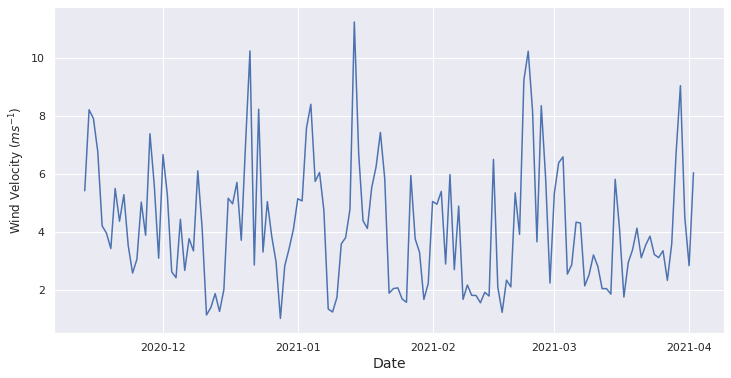

In [53]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
p = sns.lineplot(data=df, x="TIMESTAMP", y="WS_ms_S_WVT")
p.set_xlabel("Date", fontsize = 14)
p.set_ylabel('Wind Velocity ($ms^{-1}$)')

In [14]:
from windrose import WindroseAxes
from windrose import plot_windrose
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
# Grab the data
ws = df.WS_ms_S_WVT
wd = df.WindDir_D1_WVT

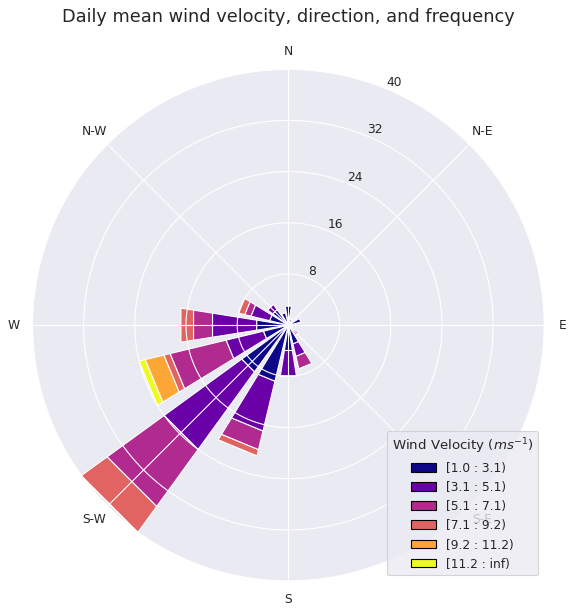

In [54]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=False, opening=0.8, cmap=cm.plasma, edgecolor='white')

xtl = ax.set_xticklabels(["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"])
legend = ax.legend(loc='lower right',  title='Wind Velocity ($ms^{-1}$)')

plt.title("Daily mean wind velocity, direction, and frequency",y=1.08, fontsize = 16) #y=1.08 raises the title
plt.show()


In [ ]:
import seaborn as sns
sns.lineplot(data=dfSM, x="TIMESTAMP", y="value", hue="variable")

Now do the same for soil temperature, and create a similar plot. 

Also figure out how to export your graphic, and then email it to me by 7:30.

In [ ]:
sns.set(style = 'whitegrid') 
    
sns.violinplot(x ="variable", 
             y ="value",
             data = dfSM)

In [ ]:
sns.set(style = 'whitegrid') 
    
sns.violinplot(x ="variable", 
             y ="value",
             data = dfTMP)